In [1]:
import time
import numpy as np
from opt_einsum import contract as einsum
import pyscf
from pyscf import gto, scf, dft, tddft, data, lib
import matplotlib.pylab as plt
import argparse
import os
import yaml
from pyscf.tools import molden
from pyscf.dft import xcfun

In [2]:
mol = gto.Mole()
mol.build(atom = '\
C         -4.89126        3.29770        0.00029;\
O         -3.49307        3.28429       -0.00328;\
H         -5.28213        2.58374        0.75736;\
H         -5.28213        3.05494       -1.01161;\
H         -5.23998        4.31540        0.27138;\
H         -3.22959        2.35981       -0.24953',\
basis = 'def2-SVP')

In [3]:
# mol = gto.Mole()
# mol.build(atom = 'O         -4.89126        3.29770        0.00029;\
# H         -3.49307        3.28429       -0.00328;\
# H         -5.28213        2.58374        0.75736', basis = 'def2-SVP', symmetry = True)

In [4]:
mol.verbose = 5
mf = dft.RKS(mol) 
mf.conv_tol = 1e-10
mf.grids.level = 6     # 0-9, big number for large mesh grids, default is 3

# mf = mf.density_fit()
mf.xc = 'wb97x'


kernel_0 = time.time()
mf.kernel()
with open('methanol.molden', 'w') as f1: 
    molden.header(mol, f1) 
    molden.orbital_coeff(mol, f1, mf.mo_coeff, ene=mf.mo_energy, occ=mf.mo_occ)
kernel_1 = time.time()
kernel_t = kernel_1 - kernel_0
print ('SCF Done after ', round(kernel_t, 4), 'seconds')



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-10
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/yv/2d0zlq3j1dq04l1tjz4qgg800000gn/T/tmpmg03tv36
max_memory 4000 MB (current use 0 MB)
XC functionals = wb97x
small_rho_cutoff = 1e-07
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x7f811b1eb9e0>
grids dens level: 6
symmetrized grids: False
atomic radii adjust function: <function treutler_atomic_radii_adjust at 0x7f811b1eb950>
Set gradient conv threshold to 1e-05
atom C rad-grids = 120, ang-grids = [ 50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50

    CPU time for cycle= 5      1.29 sec, wall time      0.64 sec
  HOMO = -0.368810080960343  LUMO = 0.146469993396621
  mo_energy =
[-19.19234939 -10.31114982  -1.12542927  -0.78680966  -0.60944086
  -0.54995748  -0.52974631  -0.42981628  -0.36881008   0.14646999
   0.19187465   0.23112153   0.23252858   0.29830096   0.55924745
   0.57660511   0.59049248   0.68803832   0.75141761   0.76482295
   0.78000699   0.81371424   1.06193193   1.06751954   1.12567957
   1.33038377   1.41027917   1.55981436   1.57834803   1.62800027
   1.66372521   1.81614837   1.87020814   1.92648116   1.98587205
   2.08772601   2.24771335   2.3101692    2.42928683   2.4632457
   2.75390506   2.90122306   2.92781129   3.0542042    3.17134618
   3.27594831   3.41197643   3.83963792]
nelec by numeric integration = 17.99999999416916
    CPU time for vxc      1.04 sec, wall time      0.52 sec
    CPU time for vj and vk      0.13 sec, wall time      0.06 sec
E1 = -236.97595350798196  Ecoul = 96.48836961424028  Exc =

In [5]:
# td = tddft.TDDFT(mf)
td = tddft.TDA(mf)
# td.kernel()
vind, hdiag = td.gen_vind(mf)

Converting <class 'pyscf.dft.rks.RKS'> to RHF


In [6]:
def matrix_vector(V):
    return vind(V.T).T

In [7]:
td = tddft.TDDFT(mf)
# td = tddft.TDA(mf)
td.nstates = 10
# td.kernel()
TDDFT_vind, TDDFT_hdiag = td.gen_vind(mf)


Converting <class 'pyscf.dft.rks.RKS'> to RHF


In [8]:
A_size = hdiag.shape[0]

In [9]:
# I = np.eye(A_size)
# A = vind(I)
# plt.matshow(A)
# plt.show()

In [10]:
# II = np.hstack([I,I])
# AB1 = TDDFT_vind(II)
# plt.matshow(AB1)
# plt.show()

In [11]:
# II = np.hstack([I,-I])
# AB4 = TDDFT_vind(II)
# plt.matshow(AB4)
# plt.show()

In [12]:
# a = AB1[:, A_size:]
# b = AB1[:, :A_size]
# c = a + b
# print(np.linalg.norm(c))
# plt.matshow(c)
# plt.show()

In [13]:
# zero = np.zeros_like(I)
# II = np.hstack([I,zero])
# AB2 = TDDFT_vind(II)
# plt.matshow(AB2)
# plt.show()

In [14]:
# zero = np.zeros_like(I)
# II = np.hstack([zero, I])
# AB3 = TDDFT_vind(II)
# plt.matshow(AB3)
# plt.show()

In [15]:
mo_occ = mf.mo_occ
########################################################################
# Collect everything needed from PySCF
Qstart = time.time()
# extract vind() function
# td = tddft.TDA(mf)
# vind (V) = A*V

Natm = mol.natm


occupied = len(np.where(mo_occ > 0)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
virtual = len(np.where(mo_occ == 0)[0])

# AO = [int(i.split(' ',1)[0]) for i in mol.ao_labels()]
# # .split(' ',1) is to split each element by space, split once.
# # mol.ao_labels() it is Labels of AO basis functions
# # AO is a list of corresponding atom_id

N_bf = len(mo_occ)
R = pyscf.gto.mole.inter_distance(mol, coords=None)
#Inter-particle distance array
# unit == ’Bohr’, Its value is 5.29177210903(80)×10^(−11) m
########################################################################


##################################################################################################
# create a function for dictionary of chemical hardness, by mappig two iteratable subject, list
# list of elements



elements = ['H','He','Li','Be','B','C','N' ,'O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn','Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr','Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn','Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd','Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb','Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg','Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th','Pa', 'U' , 'Np', 'Pu']
#list of chemical hardness, they are floats, containing elements 1-94, in Hartree
hardness = [0.47259288,0.92203391,0.17452888,0.25700733,0.33949086,0.42195412,0.50438193,0.58691863,0.66931351,0.75191607,0.17964105,0.22157276,0.26348578,0.30539645,0.34734014,0.38924725,0.43115670,0.47308269,0.17105469,0.20276244,0.21007322,0.21739647,0.22471039,0.23201501,0.23933969,0.24665638,0.25398255,0.26128863,0.26859476,0.27592565,0.30762999,0.33931580,0.37235985,0.40273549,0.43445776,0.46611708,0.15585079,0.18649324,0.19356210,0.20063311,0.20770522,0.21477254,0.22184614,0.22891872,0.23598621,0.24305612,0.25013018,0.25719937,0.28784780,0.31848673,0.34912431,0.37976593,0.41040808,0.44105777,0.05019332,0.06762570,0.08504445,0.10247736,0.11991105,0.13732772,0.15476297,0.17218265,0.18961288,0.20704760,0.22446752,0.24189645,0.25932503,0.27676094,0.29418231,0.31159587,0.32902274,0.34592298,0.36388048,0.38130586,0.39877476,0.41614298,0.43364510,0.45104014,0.46848986,0.48584550,0.12526730,0.14268677,0.16011615,0.17755889,0.19497557,0.21240778,0.07263525,0.09422158,0.09920295,0.10418621,0.14235633,0.16394294,0.18551941,0.22370139]
HARDNESS = dict(zip(elements,hardness))
#function to return chemical hardness from dictionary HARDNESS
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id)
    return HARDNESS[atom]
# mol.atom_pure_symbol(atom_id) returns pure element symbol, no special characters


########################################################################
# This block is the function to produce orthonormalized coefficient matrix C
def matrix_power(S,a):
    s,ket = np.linalg.eigh(S)
    s = s**a
    X = np.dot(ket*s,ket.T)
    #X == S^a
    return X

def orthonormalize(C):
    X = matrix_power(mf.get_ovlp(), 0.5)
    # S = mf.get_ovlp() #.get_ovlp() is basis overlap matrix
    # S = np.dot(np.linalg.inv(c.T), np.linalg.inv(c))
    C = np.dot(X,C)
    return C

C = mf.mo_coeff
# mf.mo_coeff is the coefficient matrix

C = orthonormalize(C)
# C is orthonormalized coefficient matrix
# np.dot(C.T,C) is a an identity matrix
########################################################################
RSH_F = [
'lc-b3lyp',
'wb97',
'wb97x',
'wb97x-d3',
'cam-b3lyp']
RSH_paramt = [
[0.53, 8.00, 4.50],
[0.61, 8.00, 4.41],
[0.56, 8.00, 4.58],
[0.51, 8.00, 4.51],
[0.38, 1.86, 0.90]]
RSH_F_paramt = dict(zip(RSH_F, RSH_paramt))

hybride_F = [
'b3lyp',
'tpssh',
'm05-2x',
'pbe0',
'm06',
'm06-2x',
'NA']# NA is for Hartree-Fork
hybride_paramt = [0.2, 0.1, 0.56, 0.25, 0.27, 0.54, 1]
DF_ax = dict(zip(hybride_F, hybride_paramt))
#Zhao, Y. and Truhlar, D.G., 2006. Density functional for spectroscopy: no long-range self-interaction error, good performance for Rydberg and charge-transfer states, and better performance on average than B3LYP for ground states. The Journal of Physical Chemistry A, 110(49), pp.13126-13130.

if mf.xc in RSH_F:
    a_x, beta, alpha = RSH_F_paramt[mf.xc]

elif mf.xc in hybride_F:
    beta1 = 0.2
    beta2 = 1.83
    alpha1 = 1.42
    alpha2 = 0.48

    a_x = DF_ax[mf.xc]
    beta = beta1 + beta2 * a_x
    alpha = alpha1 + alpha2 * a_x
print('a_x, beta, alpha = ', a_x, beta, alpha)

a_x, beta, alpha =  0.56 8.0 4.58


In [16]:
# creat \eta matrix
a = [Hardness (atom_id) for atom_id in range (Natm)]
a = np.asarray(a).reshape(1,-1)
eta = (a+a.T)/2

# creat GammaK and GammaK matrix
GammaJ = (R**beta + (a_x * eta)**(-beta))**(-1/beta)
GammaK = (R**alpha + eta**(-alpha)) **(-1/alpha)


Natm = mol.natm
def generateQ ():
    aoslice = mol.aoslice_by_atom()
    q = np.zeros([Natm, N_bf, N_bf])
    #N_bf is number Atomic orbitals, occupied+virtual, q is same size with C
    for atom_id in range (0, Natm):
        shst, shend, atstart, atend = aoslice[atom_id]
        q[atom_id,:, :] = np.dot(C[atstart:atend, :].T, C[atstart:atend, :])
    return q

q_tensors = generateQ()


q_tensor_ij = np.zeros((Natm, occupied, occupied))
q_tensor_ij[:,:,:] = q_tensors[:, :occupied,:occupied]

q_tensor_ab = np.zeros((Natm, virtual, virtual))
q_tensor_ab[:,:,:] = q_tensors[:, occupied:,occupied:]

q_tensor_ia = np.zeros((Natm, occupied, virtual))
q_tensor_ia[:,:,:] = q_tensors[:, :occupied,occupied:]


Q_K = einsum('Bjb, AB -> Ajb', q_tensor_ia, GammaK)
Q_J = einsum('Bab, AB -> Aab', q_tensor_ab, GammaJ)
# pre-calculate and store the Q-Gamma rank 3 tensor
Qend = time.time()

Q_time = Qend - Qstart
print ('Q-Gamma tensors building time =', round(Q_time, 4))
##################################################################################################


Q-Gamma tensors building time = 0.0191


In [17]:
###################################################################################################
# This block is to define on-the-fly two electron intergeral (pq|rs)
# A_iajb * v = delta_ia_ia*v + 2(ia|jb)*v - (ij|ab)*v

# iajb_v = einsum('Aia, Bjb, AB, jbm -> iam', q_tensor_ia, q_tensor_ia, GammaK, V)
# ijab_v = einsum('Aij, Bab, AB, jbm -> iam', q_tensor_ij, q_tensor_ab, GammaJ, V)

def iajb_fly(V):
#     V = V.reshape(occupied, virtual, -1)
    Q_K_V = einsum('Ajb, jbm -> Am', Q_K, V)
    iajb_V = einsum('Aia, Am -> iam', q_tensor_ia, Q_K_V).reshape(occupied*virtual, -1)

    return iajb_V

def ijab_fly(V):
#     V = V.reshape(occupied, virtual, -1)
    # (-1, occupied, virtual)
#     ijab_v = einsum('Aij, Aab, jbm -> iam', q_tensor_ij, Q_J,  V)

    # contract smaller index first
    # Aij_V = einsum('Aij, jbm -> Aibm', q_tensor_ij, V)
    # ijab_V = einsum('Aab, Aibm -> iam', Q_J, Aij_V).reshape(occupied*virtual, -1)

    # contract larger index first
    Aab_V = einsum('Aab, jbm -> jAam', Q_J, V)
    #('Aab, mjb -> mjaA')
    ijab_V = einsum('Aij, jAam -> iam', q_tensor_ij, Aab_V).reshape(occupied*virtual, -1)
    #('Aij, mjaA -> mia)
    return ijab_V


def ibja_fly(V):
    # the Forck exchange energy in B matrix
#     V = V.reshape(occupied, virtual, -1)
    Q_K_V = einsum('Aja, jbm -> Aabm', Q_K, V)
    ibja_V = einsum('Aib, Aabm -> iam', q_tensor_ia, Q_K_V).reshape(occupied*virtual, -1)
    return ibja_V

# in the case of TDDFT, hdiag is [[A, B],[-B, -A]].diag()
delta_diag_A = hdiag[:occupied*virtual].reshape(occupied, virtual)

def delta_fly(V):
#     V = V.reshape(occupied, virtual, -1)
    delta_v = einsum('ia,iam -> iam', delta_diag_A, V).reshape(occupied*virtual, -1)
    return delta_v

def sTDA_fly(V):
    # sTDA_A * vector
    V = V.reshape(occupied, virtual,-1)
    # this tensor contraction feature can deal with multiple vectors
    sTDA_V =  delta_fly(V) + 2*iajb_fly(V) - ijab_fly(V)
    return sTDA_V

sTDDFT_A = sTDA_fly
###################################################################################################

def sTDDFT_B(V):
    # sTDDFT_B * vector
    V = V.reshape(occupied,virtual,-1)
    sTDDFT_B = 2*iajb_fly(V) - a_x*ibja_fly(V)
    return sTDDFT_B
# print('ax =', a_x)

In [18]:
def sTDDFT_matrix_vector(X, Y):
    #return AX+BY and AY+BX
    
    X = X.reshape(occupied, virtual,-1)
    Y = Y.reshape(occupied, virtual,-1)
    
    iajb_X = 2*iajb_fly(X)
    iajb_Y = 2*iajb_fly(Y)
    
    #sTDA_V =  delta_fly(V) + 2*iajb_fly(V) - ijab_fly(V)
    #sTDDFT_B = 2*iajb_fly(V) - a_x*ibja_fly(V)
    
    AX = delta_fly(X) + iajb_X - ijab_fly(X)
    AY = delta_fly(Y) + iajb_Y - ijab_fly(Y)
    
    BX = iajb_X - a_x*ibja_fly(X)
    BY = iajb_Y - a_x*ibja_fly(Y)
    
    U1 = AX + BY
    U2 = AY + BX
    
    return U1[:,:], U2[:,:]

(351, 351)
[ 6.46704234  8.18160487  8.38311195  9.45187154  9.52124115  9.98601341
 10.57639437 11.2208618  11.23852179 11.5740737 ]


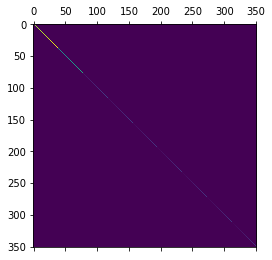

In [19]:
II = np.eye(occupied*virtual)
AA = sTDA_fly(II)
print(AA.shape)
sTDA, u = np.linalg.eigh(AA)
print(sTDA[:10]*27.211386031943245)
plt.matshow(AA)

plt.show()

(351, 351)


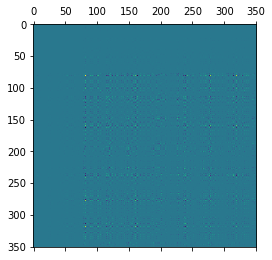

In [20]:
BB = sTDDFT_B(II)
print(BB.shape)
plt.matshow(BB)

plt.show()

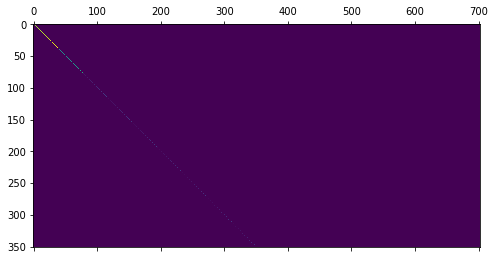

In [21]:
ab = np.hstack([AA,BB])
plt.matshow(ab)

plt.show()

In [22]:
def symplectic_eigensolver(a,b):
    # solve the standard symplectic eigenvalue problem, we want omega, x, y
    # (a-b)(a+b)(x+y) = omega^2(x+y)
    # MZ = Z*omega^2
    # M = (a+b)^1/2(a-b)(a+b)^1/2
    # Z = (a+b)^1/2 (x+y)
    # firt, compute (a+b)^1/2
    ab_half = matrix_power(a+b, 0.5)
        
    M = np.linalg.multi_dot([ab_half, a-b, ab_half])
    omega2, Z = np.linalg.eigh(M)
#     print('=========')
#     print('omega2',omega2)
    omega = omega2**0.5
#     print(omega)
    omega_inv = (1/omega).reshape(1,-1)
    #reshape omega as <omega| is to make sure column i in np.dot(a+b, x_p_y) is multiplied by omega_i
    
    x_p_y = np.dot(matrix_power(a+b, -0.5), Z)
    x_m_y = np.dot(a+b, x_p_y)*omega_inv

    x = (x_p_y + x_m_y)/2
    y = (x_p_y - x_m_y)/2
    
    return omega, x, y

In [23]:
omega, x, y = symplectic_eigensolver(AA,BB)
print(omega[:20]*27.211386031943245)

n = occupied*virtual
# sigma = np.eye(n)

# energy, xx, yy = quick_solver(AA, BB, sigma, 20)
# print(energy*27.211386031943245)


[ 6.46601107  8.18009785  8.38093337  9.45002976  9.50601655  9.97874743
 10.57333388 11.20528027 11.23398868 11.57258896 12.20977306 12.43591888
 12.897399   13.41535367 13.57275462 13.87290318 13.87643229 14.49038972
 14.54263876 14.93475391]


In [24]:
##############################################################################################
# orthonormalization of guess_vectors
def Gram_Schdmit_bvec(A, bvec):
    # suppose A is orthonormalized
    projections_coeff = np.dot(A.T, bvec)
    bvec = bvec - np.dot(A, projections_coeff)
    return bvec

def Gram_Schdmit(A):
    # A matrix has J columns, orthonormalize each columns
    # unqualified vectors will be removed
    N_rows = np.shape(A)[0]
    N_vectors = np.shape(A)[1]
    A = A/np.linalg.norm(A, axis=0, keepdims = True)

    B = np.zeros((N_rows,N_vectors))
    count = 0
    ############b
    for j in range (0, N_vectors):
        bvec = Gram_Schdmit_bvec (B[:, :count], A[:, j])
        norm = np.linalg.norm(bvec)
        if norm > 1e-14:
            B[:, count] = bvec/np.linalg.norm(bvec)
            count +=1
    return B[:, :count]

def Gram_Schdmit_fill_holder (V, count, vecs):
    # V is a vectors holder
    # count is the amount of vectors that already sit in the holder
    m = count
    nvec = np.shape(vecs)[1]
    # amount of new vectors intended to fill in the V

    # count will be final amount of vectors in V
    for j in range (0, nvec):
        vec = vecs[:, j]
        vec = Gram_Schdmit_bvec(V[:, :m], vec)   #single orthonormalize
        vec = Gram_Schdmit_bvec(V[:, :m], vec)   #double orthonormalize

        norm = np.linalg.norm(vec)
        if  norm > 1e-14:
            vec = vec/norm
            V[:, m] = vec
            m += 1
        else:
            print('vector kicked out during GS orthonormalization')
    new_count = m

    return V, new_count
########################################################################


In [25]:
#####################################################
def TDDFT_A_diag_preconditioner(R_x, R_y, omega):
    # preconditioners for each corresponding residual
    k = R_x.shape[1]
#     print('omega.shape',omega.shape)
    t = 1e-14
    
    d = np.repeat(delta_diag_A.reshape(-1,1), k, axis=1)

    D_x = d - omega
    D_x = np.where( abs(D_x) < t, np.sign(D_x)*t, D_x)
    
    D_y = d + omega
    D_y = np.where( abs(D_y) < t, np.sign(D_y)*t, D_y)
    # force all values not in domain (-t, t)

#     print('R_x.shape, D_x.shape',R_x.shape, D_x.shape)
    X_new = R_x/D_x
    Y_new = R_y/D_y

    return X_new[:,:], Y_new[:,:]
#######################################################

In [26]:
####################################################################
# define the orthonormality of a matrix A as the norm of (A.T*A - I)
# you expect 0
def check_orthonormal(A):
    n = np.shape(A)[1]
    B = np.dot (A.T, A)
    c = np.linalg.norm(B - np.eye(n))
    return c
####################################################################

In [27]:
def check_Hermitian(A):
    B = (A.T - A)
    return np.linalg.norm(B)

In [28]:
########################################################################
def solve_AX_Xla_B(sub_A, eigen_lambda, sub_B):
    # AX - XB  = Q
    # sub_A X - X eigen_lambda = sub_B
    N_vectors = len(eigen_lambda)
    a, u = np.linalg.eigh(sub_A)
    ub = np.dot(u.T, sub_B)
    ux = np.zeros_like(sub_B)
    for k in range (N_vectors):
        ux[:, k] = ub[:, k]/(a - eigen_lambda[k])
    sub_guess = np.dot(u, ux)
    return sub_guess
#########################################################################

In [29]:
def TDDFT_subspace_eigen_solver_1(a, b, sigma, pi, k):
    l = sigma.shape[0]
    
    H1 = np.zeros((2*l, 2*l))
    H2 = np.zeros_like(H1)
    
    H1[:l,:l] = a[:,:]
    H1[l:,l:] = a[:,:]
    H1[:l,l:] = b[:,:]
    H1[l:,:l] = b[:,:]
    
    H2[:l,:l] = sigma[:,:]
    H2[l:,l:] = -sigma[:,:]
    H2[:l,l:] = pi[:,:]
    H2[l:,:l] = -pi[:,:]
    
    H2_inv = matrix_power(H2, -1)
    
#     eee,xx = np.linalg.eigh(H2)

    M = np.dot(H2_inv, H1)
    
    omega, xy = np.linalg.eig(M)
#     print('omega1', omega)
#     print('xy norm1111', np.linalg.norm(xy, axis=0))
    index = np.argsort(omega)
    omega = omega[index][l:l+k]

 
    x = xy[:l,index][:,l:l+k]
    y = xy[l:,index][:,l:l+k]
    
    print('norm check')
    norms = np.dot((x - y).T, np.dot(sigma,x)+np.dot(pi,y))
    check = np.linalg.norm(norms - np.eye(k))
    print(check)
    
    return omega, x, y

In [30]:
def TDDFT_subspace_eigen_solver_2(a, b, sigma, pi, k):
    l = sigma.shape[0]
    
    H1 = np.zeros((2*l, 2*l))
    H2 = np.zeros_like(H1)
    
    H1[:l,:l] = a[:,:]
    H1[l:,l:] = a[:,:]
    H1[:l,l:] = b[:,:]
    H1[l:,:l] = b[:,:]
    
    H2[:l,:l] = sigma[:,:]
    H2[l:,l:] = -sigma[:,:]
    H2[:l,l:] = pi[:,:]
    H2[l:,:l] = -pi[:,:]
    
    #H1^-1/2
    H1_mhalf = matrix_power(H1, -0.5)

    M = np.linalg.multi_dot([H1_mhalf, H2, H1_mhalf])
    
    omega_inv, Z = np.linalg.eigh(M)
#     print('subspace')
#     print('omega_inv', omega_inv*27.211386031943245)
    
    omega = 1/omega_inv
    
    index = np.argsort(omega)
    omega = omega[index][l:l+k]
#     print('omega', omega*27.211386031943245)
#     print('index', index)
#     print('index[l:l+k]', index[l:l+k])
#     print('omega22222', omega)

    xy = np.dot(H1_mhalf, Z)[:,index][:,l:l+k]
    
#     xy_norm = np.linalg.norm(xy, axis=0)
# #     print('xy norm22222', xy_norm)
#     xy = xy/xy_norm
    
    for i in range(k):
        x_tmp = xy[:l,i]
        y_tmp = xy[l:,i]
        
        norm = np.dot(x_tmp - y_tmp, np.dot(sigma,x_tmp)+np.dot(pi,y_tmp))**0.5
        
        xy[:l,i] = x_tmp/norm
        xy[l:,i] = y_tmp/norm
        
#         print('norm check')
#         x_tmp = xy[:l,i]
#         y_tmp = xy[l:,i]
#         norm = np.dot(x_tmp - y_tmp, np.dot(sigma,x_tmp)+np.dot(pi,y_tmp))**0.5
#         print(norm)
    
    x = xy[:l,:]
    y = xy[l:,:]
    
#     print('norm check')
#     norms = np.dot((x - y).T, np.dot(sigma,x)+np.dot(pi,y))
#     check = np.linalg.norm(norms - np.eye(k))
#     print(check)
    
    return omega, x, y

In [31]:
def matrix_power2(S):
    s,ket = np.linalg.eigh(S)
    
    s_sqrt = s**0.5
    s_inv = 1/s_sqrt
    
    S1 = np.dot(ket*s_sqrt,ket.T)
    S2 = np.dot(ket*s_inv,ket.T)
    
    #S1 == S^1/2
    #S2 == S^-1/2
    
    return S1, S2

In [32]:
def TDDFT_subspace_eigen_solver_3(a, b, sigma, pi, k):
    
    a_p_b = a+b
    a_p_b_sqrt, a_p_b_mhf = matrix_power2(a_p_b)
    # a_p_b_sqrt, a_p_b_mhf = (a+b)^0.5, (a+b)^-0.5
    
    s_m_p_inv = np.linalg.inv(sigma - pi)
    # s_m_p_inv = (σ−π)^−1
    
    sa = np.dot(s_m_p_inv, a_p_b_sqrt)
    # sa = (σ−π)^−1(a+b)^1/2
    
    M = np.linalg.multi_dot([sa.T, a-b, sa])
    # M = (a+b)^1/2(σ−π)^−T(a-b)(σ−π)^−1(a+b)^1/2
    
    omega_sq, Z = np.linalg.eigh(M)
    
    omega = (omega_sq**0.5)[:k]
    Z =  Z[:,:k]
    
    x_p_y = np.dot(a_p_b_mhf, Z)
    x_m_y = np.linalg.multi_dot([s_m_p_inv, a_p_b, x_p_y])/omega
    
    x = (x_p_y + x_m_y)/2
    y = x_p_y - x

    for i in range(k):
        x_tmp = x[:,i]
        y_tmp = y[:,i]

        norm = np.dot(x_tmp - y_tmp, np.dot(sigma,x_tmp)+np.dot(pi,y_tmp))**0.5

        x[:,i] = x_tmp/norm
        y[:,i] = y_tmp/norm

    
    return omega, x, y
    

In [33]:
# a = np.random.rand(3,3)
# print(a)

# b = np.array([0,1,1000]).reshape(1,-1)

# c = a*b
# print(c)

In [34]:
def xy_symmetry_orthonormalize(xy):
    rows = int(xy.shape[0]/2)
    nvec = xy.shape[1]
    x = xy[:rows,:].reshape(-1,1)
    y = xy[rows:,:].reshape(-1,1)
    
    yx = np.vstack((y,x))

    V = np.hstack((xy,yx))
    S = np.dot(V.T,V)
    ss = matrix_power(S, -0.5)
    # x = S^-1/2
    V = np.dot(V, ss)
    
    xy = V[:,:nvec]
    
    return xy

In [35]:
def S_symmetry_orthogonal(x,y):
    # V.T V =S
    # S^-1/2 V.T VS^-1/2 =I
    # V:= VS^-1/2
    l = x.shape[0]
#     print('l =',l)
    xy = np.vstack((x,y))
    yx = np.vstack((y,x))
    
    V = np.hstack((xy,yx))
    S = np.dot(V.T,V)
    ss = matrix_power(S, -0.5)
    # x = S^-1/2
    V = np.dot(V, ss)
    
    x = V[:l,0].reshape(-1,1)
    y = V[l:,0].reshape(-1,1)
    
    return x, y


In [36]:
def VW_Gram_Schdmit(x, y, VV_p_WW, VW_p_WV):
    
    x_new = x - np.dot(VV_p_WW,x) - np.dot(VW_p_WV, y)
    y_new = y - np.dot(VV_p_WW,y) - np.dot(VW_p_WV, x)
    
    return x_new,y_new

In [37]:
for i in range(0,0):
    print(i)

In [38]:
def VW_Gram_Schdmit_fill_holder(V_holder, W_holder, m, X_new, Y_new):
    # put X_new into V, and Y_new into W
    # m is the amount of vectors that already on V or W

    nvec = np.shape(X_new)[1]
    # amount of new vectors intended to fill in the V_holder and W_holder
    
    for j in range(0, nvec):
        #x:=x−(VV+WW)x−(VW+WV)y
        #y:=y−(VV+WW)y−(VW+WV)x

        V = V_holder[:,:m]
        W = W_holder[:,:m]
        
        VV_p_WW = np.dot(V, V.T) +  np.dot(W, W.T)
        # VV_p_WW = VV+WW
        VW = np.dot(V, W.T)
        VW_p_WV = VW + VW.T
        # VW_p_WV = VW+WV
        
        x_tmp = X_new[:,j].reshape(-1,1)
        y_tmp = Y_new[:,j].reshape(-1,1)
    
        x_tmp,y_tmp = VW_Gram_Schdmit(x_tmp, y_tmp, VV_p_WW, VW_p_WV)
        x_tmp,y_tmp = VW_Gram_Schdmit(x_tmp, y_tmp, VV_p_WW, VW_p_WV)
        
        x_tmp,y_tmp = S_symmetry_orthogonal(x_tmp,y_tmp)
           
        xy_norm = (np.dot(x_tmp.T, x_tmp) +  np.dot(y_tmp.T, y_tmp))**0.5
        
        if  xy_norm > 1e-14:
            x_tmp = x_tmp/xy_norm
            y_tmp = y_tmp/xy_norm
            
            V_holder[:,m] = x_tmp[:,0]
            W_holder[:,m] = y_tmp[:,0]
            
            m += 1
        else:
            print('vector kicked out during GS orthonormalization')

#     print('check VW orthonormalization')
#     VW = np.vstack((V_holder[:,:m], W_holder[:,:m]))
#     WV = np.vstack((W_holder[:,:m], V_holder[:,:m]))
#     VWWV = np.hstack((VW,WV))
#     print(check_orthonormal(VWWV))
    
    return V_holder, W_holder, m

In [39]:
def sTDDFT_eigen_solver(k=4, tol=1e-5):
    n = occupied*virtual
    max = 30
    sTDDFT_start = time.time()
    m = 0
#     new_m = min([k+8, 2*k, n])
    new_m = k
    
#     VW_holder = np.zeros((2*n, (max+1)*k))
#     WV_holder = np.zeros_like(VW_holder)

    V_holder = np.zeros((n, (max+1)*k))
    W_holder = np.zeros_like(V_holder)
    
    U1_holder = np.zeros_like(V_holder)
    U2_holder = np.zeros_like(V_holder)
    # set up initial guess VW, transformed vectors U1&U2
    
    # D is delta_ij*delta_ab*(Ea - Ei), 
    # D is a list
    D = hdiag[:occupied*virtual]
#     print(D)
    sort = D.argsort()
    
    ##############################
    # setting up initial guess
    for j in range(new_m):
        V_holder[sort[j], j] = 1.0
#         VW_holder[sort[j], j] = 1.0

#     print('initial guess done')
    ##############################

    for ii in range(max):
#         print('||||____________________Iteration', ii, '_________')

        ###############################################################
        # creating the subspace
        V = V_holder[:,:new_m]
#         print(V)
        W = W_holder[:,:new_m]
        
        # U1 = AV + BW
        # U2 = AW + BV
        
        U1_holder[:, m:new_m], U2_holder[:, m:new_m] = sTDDFT_matrix_vector(V[:, m:new_m], W[:, m:new_m])

        U1 = U1_holder[:,:new_m]
        U2 = U2_holder[:,:new_m]
        
        a = np.dot(V.T, U1) + np.dot(W.T, U2)
        b = np.dot(V.T, U2) + np.dot(W.T, U1)
        
        sigma = np.dot(V.T, V) - np.dot(W.T, W)
        pi = np.dot(V.T, W) - np.dot(W.T, V)
        
#         print('sigma.shape', sigma.shape)
        ###############################################################
        
        ###############################################################
#         solve the eigenvalue omega in the subspace
        omega, x, y = TDDFT_subspace_eigen_solver_3(a, b, sigma, pi, k)
        
        ###############################################################
        # compute the residual
        # R_x = U1x + U2y - (Vx + Wy)omega
        # R_y = U2x + U1y + (Wx + Vy)omega
        U1x = np.dot(U1,x)
        U2x = np.dot(U2,x)
        Vx = np.dot(V,x)
        Wx = np.dot(W,x)
        
        U1y = np.dot(U1,y)
        U2y = np.dot(U2,y)
        Vy = np.dot(V,y)
        Wy = np.dot(W,y)       
        
        X_full = Vx + Wy
        Y_full = Wx + Vy
        
        R_x = U1x + U2y - X_full*omega
        R_y = U2x + U1y + Y_full*omega
        
        residual = np.vstack((R_x, R_y))
#         print('residual.shape', residual.shape)
        r_norms = np.linalg.norm(residual, axis=0).tolist()
#         print('r_norms', r_norms)
        if np.max(r_norms) < tol:
            break
        # index for unconverged residuals
        index = [r_norms.index(i) for i in r_norms if i > tol]
#         print('index', index)
        ###############################################################
        
        #####################################################################################
        # preconditioning step
        X_new, Y_new = TDDFT_A_diag_preconditioner(R_x[:,index], R_y[:,index], omega[index])
        #####################################################################################

        ###############################################################
        # GS and symmetric orthonormalization 
        m = new_m
#         VW_holder, WV_holder, new_m = VW_Gram_Schdmit_fill_holder(VW_holder, WV_holder, m, X_new, Y_new)
        V_holder, W_holder, new_m = VW_Gram_Schdmit_fill_holder(V_holder, W_holder, m, X_new, Y_new)
#         print('m & new_m', m, new_m)
        if new_m == m:
            print('All new guesses kicked out during GS orthonormalization')
            break
        ###############################################################

    sTDDFT_end = time.time()
    
    sTDDFT_cost = sTDDFT_end - sTDDFT_start
    
    if ii == (max -1):
        print('============================ sTD-DFT Failed Due to Iteration Limit============================')
        print('sTD-DFT failed after ', ii+1, 'iterations  ', round(sTDDFT_cost, 4), 'seconds')
        print('current residual norms', r_norms)
        print('max_norm = ', np.max(r_norms))
    else:    
        print('sTDDFT Converged after ', ii+1, 'iterations  ', round(sTDDFT_cost, 4), 'seconds')
    return omega*27.211386031943245, X_full[:,:], Y_full[:,:]

In [40]:
energies, x, y = sTDDFT_eigen_solver(k=10, tol=1e-5)
print('==================================')
print(energies)
# standard [ 7.03286631  8.56767304  8.84559735  9.7709416   9.88511441 10.28168738
#  10.90050102 11.4789538  11.55055421 11.65375287 12.14719043 12.66656461
#  12.96719081 13.37025774 13.84251204 13.97013905 14.29033895 14.47404295
#  14.73036108 15.091476  ]

sTDDFT Converged after  9 iterations   0.1389 seconds
[ 6.46601107  8.18009785  8.38093337  9.45002976  9.50601655  9.97874743
 10.57333388 11.20528027 11.23398868 11.57258896]


In [41]:
def TDDFT_matrix_vector(X, Y):
    A_size = X.shape[0]
    XY = np.vstack((X,Y)).T
    U = TDDFT_vind(XY)
#     print('U.shape',U.shape)
    U1 = U[:,:A_size].T
    U2 = -U[:,A_size:].T
    return U1[:,:], U2[:,:]

In [42]:
def sTDDFT_preconditioner_subspace_eigen_solver(a, b, sigma, pi, p, q, omega):
    a_p_b = a+b
    a_p_b_sqrt, a_p_b_mhf = matrix_power2(a_p_b)
    # a_p_b_sqrt, a_p_b_mhf = (a+b)^0.5, (a+b)^-0.5
    
    s_m_p_inv = np.linalg.inv(sigma - pi)
    # s_m_p_inv = (σ−π)^−1
    
    sa = np.dot(s_m_p_inv, a_p_b_sqrt)
    # sa = (σ−π)^−1(a+b)^1/2
    # sa.T = (a+b)^1/2(σ−π)^−T
    a_m_b = a-b
    M = np.linalg.multi_dot([sa.T, a_m_b, sa])
    # M = (a+b)^1/2(σ−π)^−T(a-b)(σ−π)^−1(a+b)^1/2
    
    t = (p-q)*omega + np.linalg.multi_dot([a_m_b,s_m_p_inv,p+q])
    T = np.dot(sa.T, t)
    
    # T = (a+b)^1/2(σ−π)^−T[(p-q)w + (a-b)(σ−π)^−1(p+q)]
    
    
    # MZ - Zw^2 = T
    Z = solve_AX_Xla_B(M, omega**2, T)
    
    x_p_y = np.dot(a_p_b_mhf, Z)
    
    x_m_y = np.dot(s_m_p_inv, np.dot(a_p_b, x_p_y)-p-q)/omega
    
    x = (x_p_y + x_m_y)/2
    y = x_p_y - x
    
    return x, y

In [43]:
def sTDDFT_preconditioner(P, Q, omega):
    tol = 1e-4
    n = occupied*virtual
    max = 30
    sTDDFT_start = time.time()
    k = len(omega)
    m = 0
#     new_m = min([k+8, 2*k, n])

    V_holder = np.zeros((n, (max+1)*k))
    W_holder = np.zeros_like(V_holder)
    
    U1_holder = np.zeros_like(V_holder)
    U2_holder = np.zeros_like(V_holder)

    # D is delta_ij*delta_ab*(Ea - Ei), 
    # D is a list
    D = hdiag[:occupied*virtual]
#     print(D)
    sort = D.argsort()
    
    ##############################
    # setting up initial guess
    
    X_new, Y_new  = TDDFT_A_diag_preconditioner(P, Q, omega)
    
    V_holder, W_holder, new_m = VW_Gram_Schdmit_fill_holder(V_holder, W_holder, 0,  X_new, Y_new)
#     print('new_m =', new_m)
#     print('initial guess done')
    ##############################

    for ii in range(max):
#         print('||||____________________Iteration', ii, '_________')

        ###############################################################
        # creating the subspace
        V = V_holder[:,:new_m]
        W = W_holder[:,:new_m]
        
        # U1 = AV + BW
        # U2 = AW + BV
        
        U1_holder[:, m:new_m], U2_holder[:, m:new_m] = sTDDFT_matrix_vector(V[:, m:new_m], W[:, m:new_m])

        U1 = U1_holder[:,:new_m]
        U2 = U2_holder[:,:new_m]
        
        a = np.dot(V.T, U1) + np.dot(W.T, U2)
        b = np.dot(V.T, U2) + np.dot(W.T, U1)
        
        sigma = np.dot(V.T, V) - np.dot(W.T, W)
        pi = np.dot(V.T, W) - np.dot(W.T, V)
        
        # p = VP + WQ
        # q = WP + VQ
        p = np.dot(V.T, P) + np.dot(W.T, Q) 
        q = np.dot(W.T, P) + np.dot(V.T, Q) 
        
#         print('sigma.shape', sigma.shape)
        ###############################################################
        
        ###############################################################
#         solve the x & y in the subspace
        x, y = sTDDFT_preconditioner_subspace_eigen_solver(a, b, sigma, pi, p, q, omega)
        ###############################################################
        
        ###############################################################
        # compute the residual
        # R_x = U1x + U2y - (Vx + Wy)omega
        # R_y = U2x + U1y + (Wx + Vy)omega
        U1x = np.dot(U1,x)
        U2x = np.dot(U2,x)
        Vx = np.dot(V,x)
        Wx = np.dot(W,x)
        
        U1y = np.dot(U1,y)
        U2y = np.dot(U2,y)
        Vy = np.dot(V,y)
        Wy = np.dot(W,y)       
        
        X_full = Vx + Wy
        Y_full = Wx + Vy
        
        R_x = U1x + U2y - X_full*omega - P
        R_y = U2x + U1y + Y_full*omega - Q
        
        residual = np.vstack((R_x, R_y))
#         print('residual.shape', residual.shape)
        r_norms = np.linalg.norm(residual, axis=0).tolist()
#         print('r_norms', r_norms)
        if np.max(r_norms) < tol:
            break
        # index for unconverged residuals
        index = [r_norms.index(i) for i in r_norms if i > tol]
#         print('index', index)
        ###############################################################
        
        #####################################################################################
        # preconditioning step
        X_new, Y_new = TDDFT_A_diag_preconditioner((R_x+P)[:,index], (R_y+Q)[:,index], omega[index])
        #####################################################################################

        ###############################################################
        # GS and symmetric orthonormalization 
        m = new_m
        V_holder, W_holder, new_m = VW_Gram_Schdmit_fill_holder(V_holder, W_holder, m, X_new, Y_new)
#         print('m & new_m', m, new_m)
        if new_m == m:
            print('All new guesses kicked out during GS orthonormalization')
            break
        ###############################################################

    sTDDFT_end = time.time()
    
    sTDDFT_precond_cost = sTDDFT_end - sTDDFT_start
    
    if ii == (max -1):
        print('============================ sTDDFT_precond Failed Due to Iteration Limit============================')
        print('sTDDFT_precond failed after ', ii+1, 'iterations  ', round(sTDDFT_precond_cost, 4), 'seconds')
        print('current residual norms', r_norms)
        print('max_norm = ', np.max(r_norms))
    else:    
        print('sTDDFT_precond Converged after ', ii+1, 'iterations  ', round(sTDDFT_precond_cost, 4), 'seconds')
        
    return X_full, Y_full

In [44]:
def TDDFT_A_diag_initial_guess(V_holder, W_holder, new_m):
    # D is delta_ij*delta_ab*(Ea - Ei), 
    # D is a list
    D = hdiag[:occupied*virtual]
    sort = D.argsort()
    for j in range(new_m):
        V_holder[sort[j], j] = 1.0
    return V_holder, W_holder, new_m

In [45]:
def sTDDFT_initial_guess(V_holder, W_holder, new_m):
    energies, X_new, Y_new = sTDDFT_eigen_solver(new_m, tol=1e-5)
    V_holder, W_holder, new_m = VW_Gram_Schdmit_fill_holder(V_holder, W_holder, 0,  X_new, Y_new)
    return V_holder, W_holder, new_m

In [46]:
################################################################################
# a dictionary for initial guess and precodnitioner
i_key = ['sTDDFT', 'Adiag']
i_func = [sTDDFT_initial_guess, TDDFT_A_diag_initial_guess]
i_lib = dict(zip(i_key, i_func))

p_key = ['sTDDFT', 'Adiag']
p_func = [sTDDFT_preconditioner, TDDFT_A_diag_preconditioner]
p_lib = dict(zip(p_key, p_func))
################################################################################

In [47]:
def RPA_TDDFT_eigen_solver(i, p, k=4, tol=1e-5):

    RPA_TDDFT_start = time.time()
    n = occupied*virtual
    max = 30
    
    m = 0
#     new_m = min([k+8, 2*k, n])
    new_m = k
    
    initial_guess = i_lib[i]
    new_guess_generator = p_lib[p]

    V_holder = np.zeros((n, (max+1)*k))
    W_holder = np.zeros_like(V_holder)
    
    U1_holder = np.zeros_like(V_holder)
    U2_holder = np.zeros_like(V_holder)
    # set up initial guess VW, transformed vectors U1&U2
    

    
    ##############################
    # setting up initial guess
    V_holder, W_holder, new_m = initial_guess(V_holder, W_holder, new_m)

    print('new_m =', new_m)
    print('initial guess done')
    ##############################

    for ii in range(max):
        print('||||____________________Iteration', ii, '_________')

        ###############################################################
        # creating the subspace
        V = V_holder[:,:new_m]
#         print(V)
        W = W_holder[:,:new_m]
        
        # U1 = AV + BW
        # U2 = AW + BV
        
        U1_holder[:, m:new_m], U2_holder[:, m:new_m] = TDDFT_matrix_vector(V[:, m:new_m], W[:, m:new_m])

        U1 = U1_holder[:,:new_m]
        U2 = U2_holder[:,:new_m]
        
        a = np.dot(V.T, U1) + np.dot(W.T, U2)
        b = np.dot(V.T, U2) + np.dot(W.T, U1)
        
        sigma = np.dot(V.T, V) - np.dot(W.T, W)
        pi = np.dot(V.T, W) - np.dot(W.T, V)
        
        print('sigma.shape', sigma.shape)
        ###############################################################
        
        ###############################################################
#         solve the eigenvalue omega in the subspace
        omega, x, y = TDDFT_subspace_eigen_solver_3(a, b, sigma, pi, k) 
        ###############################################################
        # compute the residual
        # R_x = U1x + U2y - (Vx + Wy)omega
        # R_y = U2x + U1y + (Wx + Vy)omega
        U1x = np.dot(U1,x)
        U2x = np.dot(U2,x)
        Vx = np.dot(V,x)
        Wx = np.dot(W,x)
        
        U1y = np.dot(U1,y)
        U2y = np.dot(U2,y)
        Vy = np.dot(V,y)
        Wy = np.dot(W,y)       
        
        R_x = U1x + U2y - (Vx + Wy)*omega
        R_y = U2x + U1y + (Wx + Vy)*omega
        
        residual = np.vstack((R_x, R_y))
#         print('residual.shape', residual.shape)
        r_norms = np.linalg.norm(residual, axis=0).tolist()
        print('r_norms', r_norms)
        if np.max(r_norms) < tol:
            break
        # index for unconverged residuals
        index = [r_norms.index(i) for i in r_norms if i > tol]
        print('index', index)
        ###############################################################
        
        #####################################################################################
        # preconditioning step
        X_new, Y_new = new_guess_generator(R_x[:,index], R_y[:,index], omega[index])
#         X_new, Y_new = sTDDFT_preconditioner(R_x[:,index], R_y[:,index], omega[index])
        #####################################################################################

        ###############################################################
        # GS and symmetric orthonormalization 
        m = new_m
        V_holder, W_holder, new_m = VW_Gram_Schdmit_fill_holder(V_holder, W_holder, m, X_new, Y_new)
        print('m & new_m', m, new_m)
        if new_m == m:
            print('All new guesses kicked out during GS orthonormalization')
            break
        ###############################################################

    RPA_TDDFT_end = time.time()
    
    RPA_TDDFT_cost = RPA_TDDFT_end - RPA_TDDFT_start
    
    if ii == (max -1):
        print('============================ RPA-TDDFT Failed Due to Iteration Limit============================')
        print('RPA-TDDFT failed after ', ii+1, 'iterations  ', round(RPA_TDDFT_cost, 4), 'seconds')
        print('current residual norms', r_norms)
        print('max_norm = ', np.max(r_norms))
    else:    
        print('================================== RPA-TDDFT Calculation Done ==================================')
        print('RPA-TDDFT Converged after ', ii+1, 'iterations  ', round(RPA_TDDFT_cost, 4), 'seconds')
        print('                                                                    Initial guess',i)
        print('                                                                    preconditioner', p)
        print('current residual norms', r_norms)
        print('max_norm = ', np.max(r_norms))
    return omega*27.211386031943245

In [48]:
for i in ['sTDDFT', 'Adiag']:
    for p in ['sTDDFT', 'Adiag']:
        energies = RPA_TDDFT_eigen_solver(i, p, k=10, tol=1e-5)
        print('==================================')
        print('RPA-TDDFT Excitation energies')
        print(energies)
# k=10, tol=1e-6 standard 8 iterations   14.9756 seconds
# [ 7.26524653  8.92047437  9.14664902  9.91012428 10.13497332 10.65825555 10.89864169 11.60048046 11.80443555 11.90057147]
# k=10, tol=1e-6 RPA-TDDFT Excitation energies 8 iterations   15.4234 seconds
# [ 7.26524653  8.92047437  9.14664902  9.91012428 10.13497332 10.65825555 10.89864169 11.60048046 11.80443555 11.90057147]

sTDDFT Converged after  9 iterations   0.1372 seconds
new_m = 10
initial guess done
||||____________________Iteration 0 _________
    CPU time for vj and vk      0.28 sec, wall time      0.14 sec
sigma.shape (10, 10)
r_norms [0.0811855449921049, 0.058584196745937116, 0.12724615407654974, 0.051721441522946755, 0.09121348109481058, 0.0819060567579356, 0.07313435191812497, 0.0648400272771768, 0.08811334845293275, 0.17620978926819772]
index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sTDDFT_precond Converged after  11 iterations   0.1679 seconds
m & new_m 10 20
||||____________________Iteration 1 _________
    CPU time for vj and vk      0.27 sec, wall time      0.13 sec
sigma.shape (20, 20)
r_norms [0.008361190795488806, 0.03214277115337312, 0.011055902848209441, 0.00844347627684078, 0.03006187711432197, 0.018633361375992516, 0.010730481657545688, 0.023973343745181393, 0.03945456550144177, 0.07351963907992588]
index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sTDDFT_precond Converged after  13 iterations   0.1743 

    CPU time for vj and vk      0.15 sec, wall time      0.08 sec
sigma.shape (80, 80)
r_norms [2.22224013700525e-06, 5.942041936640462e-07, 6.227651010025537e-07, 1.6139409497113663e-06, 1.2194300909882958e-06, 1.3732954870125574e-06, 1.1141528335687074e-06, 4.012191824618601e-06, 1.5745205266186437e-06, 3.882114505305096e-06]
================================== RPA-TDDFT Calculation Done ==================================
RPA-TDDFT Converged after  10 iterations   18.3584 seconds
                                                                    Initial guess sTDDFT
                                                                    preconditioner Adiag
current residual norms [2.22224013700525e-06, 5.942041936640462e-07, 6.227651010025537e-07, 1.6139409497113663e-06, 1.2194300909882958e-06, 1.3732954870125574e-06, 1.1141528335687074e-06, 4.012191824618601e-06, 1.5745205266186437e-06, 3.882114505305096e-06]
max_norm =  4.012191824618601e-06
RPA-TDDFT Excitation energies
[ 7.57573217  

    CPU time for vj and vk      0.27 sec, wall time      0.14 sec
sigma.shape (69, 69)
r_norms [3.000052971206156e-06, 8.040305142474716e-06, 2.7166231031851767e-06, 1.5995558413120104e-06, 2.0789013884583537e-05, 2.5777088005236505e-05, 1.4865610575616555e-05, 2.604010301309629e-05, 0.00036986711770029007, 0.000637621743671158]
index [4, 5, 6, 7, 8, 9]
m & new_m 69 75
||||____________________Iteration 7 _________
    CPU time for vj and vk      0.24 sec, wall time      0.12 sec
sigma.shape (75, 75)
r_norms [2.4767688194291046e-06, 3.39158874086254e-06, 8.35720972132799e-07, 1.597710778892056e-06, 2.557123833563718e-06, 3.78724661624779e-06, 1.5940660001222394e-06, 3.0683603028288233e-06, 5.309580919153973e-05, 8.736085940383887e-05]
index [8, 9]
m & new_m 75 77
||||____________________Iteration 8 _________
    CPU time for vj and vk      0.16 sec, wall time      0.08 sec
sigma.shape (77, 77)
r_norms [2.4767687669086403e-06, 3.144957065319653e-06, 8.357163219548045e-07, 1.5977110359852

In [49]:
# def sTDDFT_preconditioner(Rx, Ry, omega):
#         n = occupied*virtual
#     max = 30
#     sTDDFT_precond_start = time.time()
#     m = 0
# #     new_m = min([k+8, 2*k, n])
#     new_m = k
    
#     VW_holder = np.zeros((2*n, (max+1)*k))
#     WV_holder = np.zeros_like(VW_holder)
    
#     U1_holder = np.zeros((n, (max+1)*k))
#     U2_holder = np.zeros_like(U1_holder)
#     # set up initial guess VW, transformed vectors U1&U2
    
#     # D is delta_ij*delta_ab*(Ea - Ei), 
#     # D is a list
#     D = hdiag[:occupied*virtual]
# #     print(D)
#     sort = D.argsort()
    
#     ##############################
#     # setting up initial guess
#     for j in range(new_m):
# #         V_holder[sort[j], j] = 1.0
#         VW_holder[sort[j], j] = 1.0

#     print('initial guess done')
#     ##############################
    
#     WV_holder[n:, m:new_m] = VW_holder[:n, m:new_m]
#     WV_holder[:n, m:new_m] = VW_holder[n:, m:new_m]

#     for ii in range(max):
#         print('||||____________________Iteration', ii, '_________')

#         ###############################################################
#         # creating the subspace
#         V = VW_holder[:n,:new_m]
# #         print(V)
#         W = VW_holder[n:,:new_m]
        
#         # U1 = AV + BW
#         # U2 = AW + BV
        
#         U1_holder[:, m:new_m], U2_holder[:, m:new_m] = sTDDFT_matrix_vector(V[:, m:new_m], W[:, m:new_m])
        
#         U1 = U1_holder[:,:new_m]
#         U2 = U2_holder[:,:new_m]
        
#         a = np.dot(V.T, U1) + np.dot(W.T, U2)
#         b = np.dot(V.T, U2) + np.dot(W.T, U1)
        
#         sigma = np.dot(V.T, V) - np.dot(W.T, W)
#         pi = np.dot(V.T, W) - np.dot(W.T, V)
        
#         print('sigma.shape', sigma.shape)
#         ###############################################################
        
#         ###############################################################
# #         solve the eigenvalue omega in the subspace
#         omega, x, y = TDDFT_subspace_eigen_solver(a, b, sigma, pi, k)
#         print('########current omega', omega*27.211386031943245)
#         ###############################################################
        
#         ###############################################################
#         # compute the residual
#         # R_x = U1x + U2y - (Vx + Wy)omega
#         # R_y = U2x + U1y + (Wx + Vy)omega
#         U1x = np.dot(U1,x)
#         U2x = np.dot(U2,x)
#         Vx = np.dot(V,x)
#         Wx = np.dot(W,x)
        
#         U1y = np.dot(U1,y)
#         U2y = np.dot(U2,y)
#         Vy = np.dot(V,y)
#         Wy = np.dot(W,y)       
        
#         R_x = U1x + U2y - (Vx + Wy)*omega
#         R_y = U2x + U1y + (Wx + Vy)*omega
        
#         residual = np.vstack((R_x, R_y))
# #         print('residual.shape', residual.shape)
#         r_norms = np.linalg.norm(residual, axis=0).tolist()
#         print('r_norms', r_norms)
#         if np.max(r_norms) < tol:
#             break
#         # index for unconverged residuals
#         index = [r_norms.index(i) for i in r_norms if i > tol]
#         print('index', index)
#         ###############################################################
        
#         #####################################################################################
#         # preconditioning step
#         X_new, Y_new = TDDFT_A_diag_preconditioner(R_x[:,index], R_y[:,index], omega[index])
#         #####################################################################################

#         ###############################################################
#         # GS and symmetric orthonormalization 
#         m = new_m
#         VW_holder, WV_holder, new_m = VW_Gram_Schdmit_fill_holder(VW_holder, WV_holder, m, X_new, Y_new)
#         print('m & new_m', m, new_m)
#         if new_m == m:
#             print('All new guesses kicked out during GS orthonormalization')
#             break
#         ###############################################################

#     sTDDFT_precond_end = time.time()
    
#     sTDDFT_precond_cost = sTDDFT_precond_end - sTDDFT_precond_start
    
#     if ii == (max -1):
#         print('============================ sTDDFT_precond Failed Due to Iteration Limit============================')
#         print('sTDDFT_precond failed after ', ii+1, 'iterations  ', round(sTDDFT_precond_cost, 4), 'seconds')
#         print('current residual norms', r_norms)
#         print('max_norm = ', np.max(r_norms))
#     else:    
#         print('sTDDFT_precond Converged after ', ii+1, 'iterations  ', round(sTDDFT_precond_cost, 4), 'seconds')
        
#     return X_new, Y_new

In [50]:
# def quick_solver(a, b, sigma, k):
    
#     sigma_inv = matrix_power(sigma, -1)

#     ab_half = matrix_power(a+b, 0.5)
#     ab_m_half = matrix_power(a+b, -0.5)
    
# #     print('Checking Hermitian')
# #     print(check_Hermitian(sigma_inv))
# #     print(check_Hermitian(a-b))

#     M = np.linalg.multi_dot([ab_half, sigma_inv, a-b, sigma_inv, ab_half])
    
#     omega_square, Z = np.linalg.eigh(M)

#     omega = omega_square**0.5
#     omega_inv = (1/omega).reshape(1,-1)
    
#     x_p_y = np.dot(ab_m_half, Z)
#     x_m_y = np.linalg.multi_dot([sigma_inv, a+b, x_p_y])*omega_inv
    
#     x = 0.5*(x_p_y + x_m_y)
#     y = x_p_y - x
    
#     return omega[:k], x[:,:k], y[:,:k]

In [51]:
# def symmetry_orthonormalize(xy):
# #     print('xy.shape', xy.shape)
#     l = int(xy.shape[0]/2)
    
#     x = xy[:l,:]
#     y = xy[l:,:]
    
#     x_p_y = x + y
#     x_m_y = x - y
    
#     a = np.linalg.norm(x_p_y)/np.linalg.norm(x_m_y)
# #     print('a = ', a)
#     K = 0.5*x_p_y
#     L = a*0.5*x_m_y
    
#     x = K + L
#     y = K - L
    
# #     print('Checking xy yx orthogonal')
# #     print(np.dot(x.T,y))
#     xy[:l,:] = x
#     xy[l:,:] = y
    
#     return xy

In [52]:
# def x_y_symmetry_orthonormalize(x,y):
  
#     x_p_y = x + y
#     x_m_y = x - y
    
#     a = np.linalg.norm(x_p_y)/np.linalg.norm(x_m_y)
# #     print('a = ', a)
#     K = 0.5*x_p_y
#     L = a*0.5*x_m_y
    
#     x = K + L
#     y = K - L
    
# #     print('Checking xy yx orthogonal')
# #     print(np.dot(x.T,y))
    
#     return x, y

In [53]:
# def VW_Gram_Schdmit_fill_holder_VWstack(VW_holder, WV_holder, m, X_new, Y_new):
#     # put X_new into V, and Y_new into W
#     # m is the amount of vectors that already on V or W
#     # I have another mtheod which saves a lot memory.......
    
#     nvec = np.shape(X_new)[1]# amount of new vectors intended to fill in the VW_holder
#     rows = np.shape(X_new)[0]
#     xy = np.vstack((X_new, Y_new))
    
#     for j in range (0, nvec):
# #         print('m =',m)
#         xy_tmp = xy[:,j].reshape(-1,1)
    
# #         VWWV_tmp = np.hstack((VW_holder[:,:m], WV_holder[:,:m]))
# # #         print('check_orthonormal(VWWV_tmp)', check_orthonormal(VWWV_tmp))
        
# #         xy_tmp = Gram_Schdmit_bvec(VWWV_tmp, xy_tmp)
# #         xy_tmp = Gram_Schdmit_bvec(VWWV_tmp, xy_tmp)
 
#         xy_tmp = Gram_Schdmit_bvec(VW_holder[:,:m], xy_tmp)
#         xy_tmp = Gram_Schdmit_bvec(VW_holder[:,:m], xy_tmp)
    
#         xy_tmp = Gram_Schdmit_bvec(WV_holder[:,:m], xy_tmp)
#         xy_tmp = Gram_Schdmit_bvec(WV_holder[:,:m], xy_tmp)
    
            
        
#         xy_tmp = xy_symmetry_orthonormalize(xy_tmp)
        
#         xy_norm = np.linalg.norm(xy_tmp)
        
#         if  xy_norm > 1e-14:
#             xy_tmp = xy_tmp/xy_norm

#             VW_holder[:,m] = xy_tmp[:,0]
    
#             WV_holder[:rows,m] = xy_tmp[rows:,0]
#             WV_holder[rows:,m] = xy_tmp[:rows,0]
            
#             m += 1
#         else:
#             print('vector kicked out during GS orthonormalization')
            
#     print('Checking orthonormal of VWWV')
    
#     VWWV = np.hstack((VW_holder[:,:m], WV_holder[:,:m]))
    
#     print(check_orthonormal(VWWV))
    
#     return VW_holder, WV_holder, m

In [54]:
# def V_W_X_Y_Gram_Schdmit_fill_holder(V_holder, W_holder, m, X_new, Y_new):
#     # put X_new into V_holder, and Y_new into W_holder
#     # m is the amount of vectors that already on V_holder or W_holder

#     rows = np.shape(X_new)[0]
#     print('rows =', rows)
#     nvec = np.shape(X_new)[1]
#     # amount of new vectors intended to fill in the V or W

#     X_new = Gram_Schdmit_bvec(W_holder[:,:m], X_new)
#     Y_new = Gram_Schdmit_bvec(V_holder[:,:m], Y_new)
    
#     X_new = Gram_Schdmit_bvec(V_holder[:,:m], X_new)
#     Y_new = Gram_Schdmit_bvec(W_holder[:,:m], Y_new)
    
#     # symmetric symmetry_orthonormalize XY
#     XY = np.hstack((X_new, Y_new))
#     S = np.dot(XY.T, XY)
#     XY = np.dot(XY, matrix_power(S, -0.5))
    
#     X_new = XY[:,:nvec]
#     Y_new = XY[:,nvec:]
    
#     XY_v = np.vstack((X_new, Y_new))
    
#     norm = np.linalg.norm(XY_v, axis=0).tolist()
#     print('XY_v norm =', norm)
#     index = [norm.index(i) for i in norm if i > 1e-14]
#     print('index =', index)
#     XY_v = XY_v[:,index]/np.array(norm)[index]
    
#     new_m = m + XY_v.shape[1]
            
#     print('XY_v.shape',XY_v.shape)
#     V_holder[:, m:new_m] = XY_v[:rows,:]
#     W_holder[:, m:new_m] = XY_v[rows:,:]
            
#     print('Checking orthonormal of V.T W')
#     print(np.linalg.norm(np.dot(V_holder[:,:m].T,W_holder[:,:m])))
# #     print('Norms_of_VW', np.linalg.norm (VW, axis=0, keepdims = False))
# #     print('Checking orthonormal of WV')
# #     print(check_orthonormal(WV[:,:m]))
# #     print('Norms_of_WV', np.linalg.norm (WV, axis=0, keepdims = False))
# #     print('Checking orthonormal of VWVW')
# #     print(check_orthonormal(np.hstack((VW[:,:m],WV[:,:m]))))
    
#     return V_holder, W_holder, new_m

In [55]:
# def Symplectic_orthonormalize(V, W, v_tmp, w_tmp):
#     # given a already Symplectic_orthonormalized V&W, remove the linear depedence of v_vec & w_vec
#     # S is the projection coefficient

#     S = np.dot(V.T, v_tmp) - np.dot(W.T, w_tmp)
# #     print(S)
# #     S = S.reshape(-1,1)
#     print('####### S shape', S.shape)
#     print('####### V shape', V.shape)
#     v_tmp = v_tmp - np.dot(V, S)
#     w_tmp = w_tmp - np.dot(W, S)
#     print('####### v_tmp shape', v_tmp.shape)
#     return v_tmp, w_tmp

In [56]:
# def check_Symplectic_orthonormal(V, W):
#     VTV = np.dot(V.T, V)
#     WTW = np.dot(W.T, W)
#     Symplectic_dot = VTV - WTW
#     print('check_Symplectic_orthonormal', Symplectic_dot)
#     return Symplectic_dot

In [57]:
# def Symplectic_fill_holder(V, W, count, v_vecs, w_vecs):
#     # count is the number of vectors that already sit in V (or W)
#     # v_vecs & w_vecs are vectors that intended to put into V & W
#     m = count
#     S = np.dot(V[:,:m].T, v_vecs) - np.dot(W[:,:m].T, w_vecs)
#     nvec = np.shape(v_vecs)[1]
#     for j in range(nvec):
#         print('============================')
#         print('Symplectic_fill_holder, m', m)
#         print('Symplectic_fill_holder, vector No.', j)
#         v_tmp = v_vecs[:,j].reshape(-1,1)
#         w_tmp = w_vecs[:,j].reshape(-1,1)
        
#         v_tmp, w_tmp = Symplectic_orthonormalize(V[:,:m], W[:,:m], v_tmp, w_tmp)
#         v_tmp, w_tmp = Symplectic_orthonormalize(V[:,:m], W[:,:m], v_tmp, w_tmp) #just double check
        
#         vTv = np.dot(v_tmp.T, v_tmp)
#         wTw = np.dot(w_tmp.T, w_tmp)
#         Symplectic_dot = vTv - wTw
#         print('Symplectic_dot', Symplectic_dot)
        
#         if abs(Symplectic_dot) > 1e-7:
            
#             v_tmp = v_tmp/(Symplectic_dot**0.5)
#             w_tmp = v_tmp/(Symplectic_dot**0.5)
            
#             print('66666', v_tmp.shape)
#             V[:,m] = v_tmp[:,0]
#             W[:,m] = w_tmp[:,0]
#             m += 1
#             Symplectic_dot = check_Symplectic_orthonormal(V[:,m], W[:,m])
#         else:
#             print('vector kicked out during Symplectic orthonormalization')
#         print('============================')
#     new_count = m
    
#     return V, W, new_count

In [58]:
# def V_W_Gram_Schdmit_fill_holder(V_holder, W_holder, m, X_new, Y_new):
#     # put X_new into V_holder, and Y_new into W_holder
#     # m is the amount of vectors that already on V_holder or W_holder

#     rows = np.shape(X_new)[0]
#     nvec = np.shape(X_new)[1]

#     # amount of new vectors intended to fill in the V or W
#     for j in range (0, nvec):
# #         print('m =',m)
#         x_tmp = X_new[:,j].reshape(-1,1)
#         y_tmp = Y_new[:,j].reshape(-1,1)
#         xy_tmp = np.vstack((x_tmp,y_tmp))
#         xy_norm = np.linalg.norm(xy_tmp)
#         x_tmp = x_tmp/xy_norm
#         y_tmp = y_tmp/xy_norm
        
        
# #         x_tmp, y_tmp = S_symmetry_orthonormalize(x_tmp, y_tmp)
# #         y_tmp = Gram_Schdmit_bvec(x_tmp, y_tmp)
        
#         x_tmp = Gram_Schdmit_bvec(V_holder[:,:m], x_tmp)
#         x_tmp = Gram_Schdmit_bvec(V_holder[:,:m], x_tmp) #double filter
        
# #         x_tmp, y_tmp = S_symmetry_orthonormalize(x_tmp, y_tmp)
        
#         y_tmp = Gram_Schdmit_bvec(W_holder[:,:m], y_tmp)
#         y_tmp = Gram_Schdmit_bvec(W_holder[:,:m], y_tmp) #double filter

#         x_tmp, y_tmp = S_symmetry_orthonormalize(x_tmp, y_tmp)
        
#         xy_tmp = np.vstack((x_tmp,y_tmp))
#         xy_norm = np.linalg.norm(xy_tmp)
        
#         if  xy_norm > 1e-12:
#             x_tmp = x_tmp/xy_norm
#             y_tmp = y_tmp/xy_norm
            
#             V_holder[:,m] = x_tmp[:,0]
#             W_holder[:,m] = y_tmp[:,0]
#             m += 1
#         else:
#             print('vector kicked out during GS orthonormalization')
            
            
#     print('Checking orthonormal of V.T W')
#     print(np.linalg.norm(np.dot(V_holder[:,:m].T,W_holder[:,:m])))
# #     print('Norms_of_VW', np.linalg.norm (VW, axis=0, keepdims = False))
# #     print('Checking orthonormal of WV')
# #     print(check_orthonormal(WV[:,:m]))
# #     print('Norms_of_WV', np.linalg.norm (WV, axis=0, keepdims = False))
# #     print('Checking orthonormal of VWVW')
# #     print(check_orthonormal(np.hstack((VW[:,:m],WV[:,:m]))))
#     new_m = m
#     return V_holder, W_holder, new_m